<a href="https://colab.research.google.com/github/ktaefaa/SVM_DatasetWine/blob/main/Tugas2KB_DatasetWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#import the basic libraries
import pandas as pd
import numpy as np

In [23]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [24]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [25]:
np.bincount(df["label"])

array([59, 71, 48])

In [26]:
#check the percentage representation of the classes
df.label.value_counts(normalize=True).round(3)

1    0.399
0    0.331
2    0.270
Name: label, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

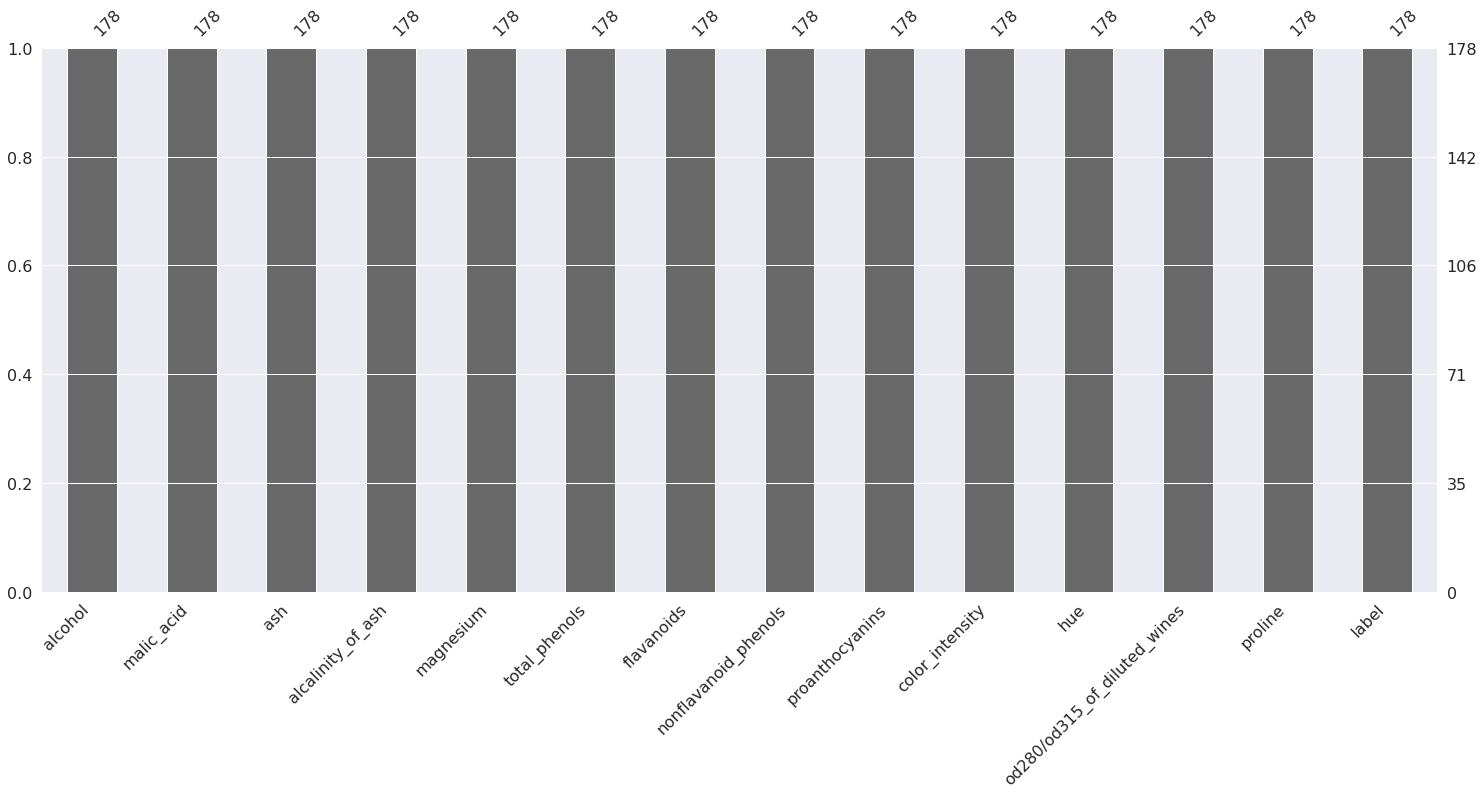

In [27]:
#check for null/missing values
df.info()
import missingno as msno
msno.bar(df)

In [38]:
df.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


In [39]:
y = df["label"]
X = df.iloc[:,:-1]

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.svm import SVC #model I will train
from sklearn.model_selection import StratifiedKFold # for splitting the training-validation data
from sklearn.model_selection import GridSearchCV #for validating hyperparameters

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

model = SVC()
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'degree': array([1, 2, 3, 4]), 'kernel': ['poly']}],
             verbose=1)

In [33]:
scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
scores[int_cols].head()

,param_C,param_kernel,param_degree,param_gamma,mean_test_score
rank_test_score,,,,,
1,0.1,poly,1,NaN,0.967667
1,0.01,poly,4,NaN,0.967667
3,0.1,linear,NaN,NaN,0.959667
3,0.1,rbf,NaN,1,0.959667
5,1,linear,NaN,NaN,0.959333


In [34]:
from sklearn.metrics import accuracy_score as accuracy #accuracy metric
fitted_model = clf.best_estimator_

predictions = fitted_model.predict(X_test)
round(accuracy(y_test, predictions), 3)

0.981